In [ ]:
import os 
import glob 
import xarray as xr 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import shutil
from scipy.stats import linregress
import cartopy.io.shapereader as shpreader
from shapely.geometry import shape
from shapely.geometry import MultiPolygon, Polygon
from shapely.ops import unary_union
from shapely.prepared import prep
import regionmask
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
import seaborn as sns
import scipy.stats as stats
import geopandas as gpd
import xesmf as xe
from matplotlib.ticker import ScalarFormatter
from shapely.geometry import Point
import matplotlib.cm as cm
import calendar
from collections import Counter
import itertools
import rasterio
import struct
from datetime import datetime, timedelta
from tqdm import tqdm
import subprocess
import urllib.request
import zipfile

# Set global font to a sans-serif type suitable for publishing
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['DejaVu Sans'],  # Use 'Helvetica' or 'DejaVu Sans' if Arial is unavailable
    'font.size': 8,               # Default font size
    'axes.titlesize': 8,          # Title font size
    'axes.labelsize': 8,          # X and Y labels font size
    'xtick.labelsize': 8,         # X-axis tick labels font size
    'ytick.labelsize': 8,         # Y-axis tick labels font size
    'legend.fontsize': 8,         # Legend font size
    'figure.titlesize': 8         # Figure title font size
})

# Change inputs

Files structure is .$home/PRISM/{var_name}/netdf

In [ ]:
# home = '/home/ib28/mymount/sd75/isabelleb/wastewater/PRISM'
home = '/home/sd96/rdf'
# home = '/home/sd96/wastewater'
shapefile = os.path.join(home, 'harris_county.geojson')
# shapefile = "/home/ib28/mymount/sd75/isabelleb/wastewater/shapefiles/Regional_County_Boundaries.shp"

# Downloading BIL Files from PRISM 

    Saves zip files in rdf in folders `zip_ppt`, `zip_tmean`, `zip_tdmean`
    Saves unziped files in rdf folders `ppt`, `tmean`, `tdmean`

In [6]:
daily = "D2"
monthly = "M3"
clim_var = "ppt"
folder = os.path.join(home, f'zip_{clim_var}')
base_url = "https://services.nacse.org/prism/data/public/4km"
start = datetime.strptime("2020-01-01", "%Y-%m-%d")
stop = datetime.strptime("2024-12-31", "%Y-%m-%d")

In [ ]:
def _progress_hook(block_num, block_size, total_size, t):
    """
    Callback function to update tqdm progress bar during file download.
    """
    downloaded = block_num * block_size
    if total_size > 0:
        t.update(min(block_size, total_size - t.n))
    else:
        t.update(downloaded - t.n)

while start <= stop:
    day = start.strftime("%Y%m%d")
    url = f"{base_url}/{clim_var}/{day}"
    output_file = os.path.join(folder, day)

    with tqdm(unit='B', unit_scale=True, unit_divisor=1024, miniters=1, desc=f'Downloading {day}') as t:
        urllib.request.urlretrieve(url, output_file, reporthook=lambda block_num, block_size, total_size: _progress_hook(block_num, block_size, total_size, t))

    start += timedelta(days=1)

In [4]:
unzip_folder = os.path.join(home, f'{clim_var}')

while start <= stop:
    day = start.strftime("%Y%m%d")
    zip_file_path = os.path.join(folder, day)

    # Check if the ZIP file exists
    if os.path.exists(zip_file_path):
        # Unzip the file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(unzip_folder)
            print(f"UNZIP file for {day} is completed.")
    else:
        print(f"ZIP file for {day} not found.")

    start += timedelta(days=1)

UNZIP file for 20200101 is completed.
UNZIP file for 20200102 is completed.
UNZIP file for 20200103 is completed.
UNZIP file for 20200104 is completed.
UNZIP file for 20200105 is completed.
UNZIP file for 20200106 is completed.
UNZIP file for 20200107 is completed.
UNZIP file for 20200108 is completed.
UNZIP file for 20200109 is completed.
UNZIP file for 20200110 is completed.
UNZIP file for 20200111 is completed.
UNZIP file for 20200112 is completed.
UNZIP file for 20200113 is completed.
UNZIP file for 20200114 is completed.
UNZIP file for 20200115 is completed.
UNZIP file for 20200116 is completed.
UNZIP file for 20200117 is completed.
UNZIP file for 20200118 is completed.
UNZIP file for 20200119 is completed.
UNZIP file for 20200120 is completed.
UNZIP file for 20200121 is completed.
UNZIP file for 20200122 is completed.
UNZIP file for 20200123 is completed.
UNZIP file for 20200124 is completed.
UNZIP file for 20200125 is completed.
UNZIP file for 20200126 is completed.
UNZIP file f

UNZIP file for 20200805 is completed.
UNZIP file for 20200806 is completed.
UNZIP file for 20200807 is completed.
UNZIP file for 20200808 is completed.
UNZIP file for 20200809 is completed.
UNZIP file for 20200810 is completed.
UNZIP file for 20200811 is completed.
UNZIP file for 20200812 is completed.
UNZIP file for 20200813 is completed.
UNZIP file for 20200814 is completed.
UNZIP file for 20200815 is completed.
UNZIP file for 20200816 is completed.
UNZIP file for 20200817 is completed.
UNZIP file for 20200818 is completed.
UNZIP file for 20200819 is completed.
UNZIP file for 20200820 is completed.
UNZIP file for 20200821 is completed.
UNZIP file for 20200822 is completed.
UNZIP file for 20200823 is completed.
UNZIP file for 20200824 is completed.
UNZIP file for 20200825 is completed.
UNZIP file for 20200826 is completed.
UNZIP file for 20200827 is completed.
UNZIP file for 20200828 is completed.
UNZIP file for 20200829 is completed.
UNZIP file for 20200830 is completed.
UNZIP file f

UNZIP file for 20210310 is completed.
UNZIP file for 20210311 is completed.
UNZIP file for 20210312 is completed.
UNZIP file for 20210313 is completed.
UNZIP file for 20210314 is completed.
UNZIP file for 20210315 is completed.
UNZIP file for 20210316 is completed.
UNZIP file for 20210317 is completed.
UNZIP file for 20210318 is completed.
UNZIP file for 20210319 is completed.
UNZIP file for 20210320 is completed.
UNZIP file for 20210321 is completed.
UNZIP file for 20210322 is completed.
UNZIP file for 20210323 is completed.
UNZIP file for 20210324 is completed.
UNZIP file for 20210325 is completed.
UNZIP file for 20210326 is completed.
UNZIP file for 20210327 is completed.
UNZIP file for 20210328 is completed.
UNZIP file for 20210329 is completed.
UNZIP file for 20210330 is completed.
UNZIP file for 20210331 is completed.
UNZIP file for 20210401 is completed.
UNZIP file for 20210402 is completed.
UNZIP file for 20210403 is completed.
UNZIP file for 20210404 is completed.
UNZIP file f

UNZIP file for 20211012 is completed.
UNZIP file for 20211013 is completed.
UNZIP file for 20211014 is completed.
UNZIP file for 20211015 is completed.
UNZIP file for 20211016 is completed.
UNZIP file for 20211017 is completed.
UNZIP file for 20211018 is completed.
UNZIP file for 20211019 is completed.
UNZIP file for 20211020 is completed.
UNZIP file for 20211021 is completed.
UNZIP file for 20211022 is completed.
UNZIP file for 20211023 is completed.
UNZIP file for 20211024 is completed.
UNZIP file for 20211025 is completed.
UNZIP file for 20211026 is completed.
UNZIP file for 20211027 is completed.
UNZIP file for 20211028 is completed.
UNZIP file for 20211029 is completed.
UNZIP file for 20211030 is completed.
UNZIP file for 20211031 is completed.
UNZIP file for 20211101 is completed.
UNZIP file for 20211102 is completed.
UNZIP file for 20211103 is completed.
UNZIP file for 20211104 is completed.
UNZIP file for 20211105 is completed.
UNZIP file for 20211106 is completed.
UNZIP file f

UNZIP file for 20220516 is completed.
UNZIP file for 20220517 is completed.
UNZIP file for 20220518 is completed.
UNZIP file for 20220519 is completed.
UNZIP file for 20220520 is completed.
UNZIP file for 20220521 is completed.
UNZIP file for 20220522 is completed.
UNZIP file for 20220523 is completed.
UNZIP file for 20220524 is completed.
UNZIP file for 20220525 is completed.
UNZIP file for 20220526 is completed.
UNZIP file for 20220527 is completed.
UNZIP file for 20220528 is completed.
UNZIP file for 20220529 is completed.
UNZIP file for 20220530 is completed.
UNZIP file for 20220531 is completed.
UNZIP file for 20220601 is completed.
UNZIP file for 20220602 is completed.
UNZIP file for 20220603 is completed.
UNZIP file for 20220604 is completed.
UNZIP file for 20220605 is completed.
UNZIP file for 20220606 is completed.
UNZIP file for 20220607 is completed.
UNZIP file for 20220608 is completed.
UNZIP file for 20220609 is completed.
UNZIP file for 20220610 is completed.
UNZIP file f

UNZIP file for 20221218 is completed.
UNZIP file for 20221219 is completed.
UNZIP file for 20221220 is completed.
UNZIP file for 20221221 is completed.
UNZIP file for 20221222 is completed.
UNZIP file for 20221223 is completed.
UNZIP file for 20221224 is completed.
UNZIP file for 20221225 is completed.
UNZIP file for 20221226 is completed.
UNZIP file for 20221227 is completed.
UNZIP file for 20221228 is completed.
UNZIP file for 20221229 is completed.
UNZIP file for 20221230 is completed.
UNZIP file for 20221231 is completed.
UNZIP file for 20230101 is completed.
UNZIP file for 20230102 is completed.
UNZIP file for 20230103 is completed.
UNZIP file for 20230104 is completed.
UNZIP file for 20230105 is completed.
UNZIP file for 20230106 is completed.
UNZIP file for 20230107 is completed.
UNZIP file for 20230108 is completed.
UNZIP file for 20230109 is completed.
UNZIP file for 20230110 is completed.
UNZIP file for 20230111 is completed.
UNZIP file for 20230112 is completed.
UNZIP file f

UNZIP file for 20230722 is completed.
UNZIP file for 20230723 is completed.
UNZIP file for 20230724 is completed.
UNZIP file for 20230725 is completed.
UNZIP file for 20230726 is completed.
UNZIP file for 20230727 is completed.
UNZIP file for 20230728 is completed.
UNZIP file for 20230729 is completed.
UNZIP file for 20230730 is completed.
UNZIP file for 20230731 is completed.
UNZIP file for 20230801 is completed.
UNZIP file for 20230802 is completed.
UNZIP file for 20230803 is completed.
UNZIP file for 20230804 is completed.
UNZIP file for 20230805 is completed.
UNZIP file for 20230806 is completed.
UNZIP file for 20230807 is completed.
UNZIP file for 20230808 is completed.
UNZIP file for 20230809 is completed.
UNZIP file for 20230810 is completed.
UNZIP file for 20230811 is completed.
UNZIP file for 20230812 is completed.
UNZIP file for 20230813 is completed.
UNZIP file for 20230814 is completed.
UNZIP file for 20230815 is completed.
UNZIP file for 20230816 is completed.
UNZIP file f

UNZIP file for 20240224 is completed.
UNZIP file for 20240225 is completed.
UNZIP file for 20240226 is completed.
UNZIP file for 20240227 is completed.
UNZIP file for 20240228 is completed.
UNZIP file for 20240229 is completed.
UNZIP file for 20240301 is completed.
UNZIP file for 20240302 is completed.
UNZIP file for 20240303 is completed.
UNZIP file for 20240304 is completed.
UNZIP file for 20240305 is completed.
UNZIP file for 20240306 is completed.
UNZIP file for 20240307 is completed.
UNZIP file for 20240308 is completed.
UNZIP file for 20240309 is completed.
UNZIP file for 20240310 is completed.
UNZIP file for 20240311 is completed.
UNZIP file for 20240312 is completed.
UNZIP file for 20240313 is completed.
UNZIP file for 20240314 is completed.
UNZIP file for 20240315 is completed.
UNZIP file for 20240316 is completed.
UNZIP file for 20240317 is completed.
UNZIP file for 20240318 is completed.
UNZIP file for 20240319 is completed.
UNZIP file for 20240320 is completed.
UNZIP file f

UNZIP file for 20240927 is completed.
UNZIP file for 20240928 is completed.
UNZIP file for 20240929 is completed.
UNZIP file for 20240930 is completed.
UNZIP file for 20241001 is completed.
UNZIP file for 20241002 is completed.
UNZIP file for 20241003 is completed.
UNZIP file for 20241004 is completed.
UNZIP file for 20241005 is completed.
UNZIP file for 20241006 is completed.
UNZIP file for 20241007 is completed.
UNZIP file for 20241008 is completed.
UNZIP file for 20241009 is completed.
UNZIP file for 20241010 is completed.
UNZIP file for 20241011 is completed.
UNZIP file for 20241012 is completed.
UNZIP file for 20241013 is completed.
UNZIP file for 20241014 is completed.
UNZIP file for 20241015 is completed.
UNZIP file for 20241016 is completed.
UNZIP file for 20241017 is completed.
UNZIP file for 20241018 is completed.
UNZIP file for 20241019 is completed.
UNZIP file for 20241020 is completed.
UNZIP file for 20241021 is completed.
UNZIP file for 20241022 is completed.
UNZIP file f

In [7]:
def parse_header(hdr_path):
    """Parses a .hdr file and returns a dictionary of header information."""
    header = {}
    with open(hdr_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                header[parts[0].upper()] = parts[1]
    return header

def read_bil_manual(bil_path, hdr_path):
    """
    Reads a .bil file manually using information from its .hdr file.
    """
    header = parse_header(hdr_path)

    nrows = int(header.get('NROWS', 0))
    ncols = int(header.get('NCOLS', 0))
    nbits = int(header.get('NBITS', 0))
    byteorder = header.get('BYTEORDER', 'I') # 'I' for Intel (little-endian), 'M' for Motorola (big-endian)
    pixeltype = header.get('PIXELTYPE', 'SIGNEDINT') # Example: FLOAT, SIGNEDINT, UNSIGNEDINT

    # Determine data type for struct and numpy
    if nbits == 8:
        dtype = np.int8 if pixeltype == 'SIGNEDINT' else np.uint8
        fmt_char = 'b' if pixeltype == 'SIGNEDINT' else 'B'
    elif nbits == 16:
        dtype = np.int16 if pixeltype == 'SIGNEDINT' else np.uint16
        fmt_char = 'h' if pixeltype == 'SIGNEDINT' else 'H'
    elif nbits == 32:
        if pixeltype == 'FLOAT':
            dtype = np.float32
            fmt_char = 'f'
        else:
            dtype = np.int32 if pixeltype == 'SIGNEDINT' else np.uint32
            fmt_char = 'i' if pixeltype == 'SIGNEDINT' else 'I'
    else:
        raise ValueError(f"Unsupported NBITS: {nbits}")

    endian_prefix = '<' if byteorder == 'I' else '>' # Little-endian or Big-endian

    with open(bil_path, 'rb') as f:
        bil_data = f.read()

    # Unpack binary data
    num_elements = nrows * ncols
    format_string = f"{endian_prefix}{num_elements}{fmt_char}"
    unpacked_data = struct.unpack(format_string, bil_data)

    # Reshape into a 2D array
    data_array = np.array(unpacked_data, dtype=dtype).reshape(nrows, ncols)

    return data_array

# Example usage:
bil_file = os.path.join(home, f'{clim_var}', f'PRISM_{clim_var}_stable_4km{daily}_20210101_bil.bil') 
hdr_file = os.path.join(home, f'{clim_var}', f'PRISM_{clim_var}_stable_4km{daily}_20210101_bil.hdr') 
bil_data_manual = read_bil_manual(bil_file, hdr_file)

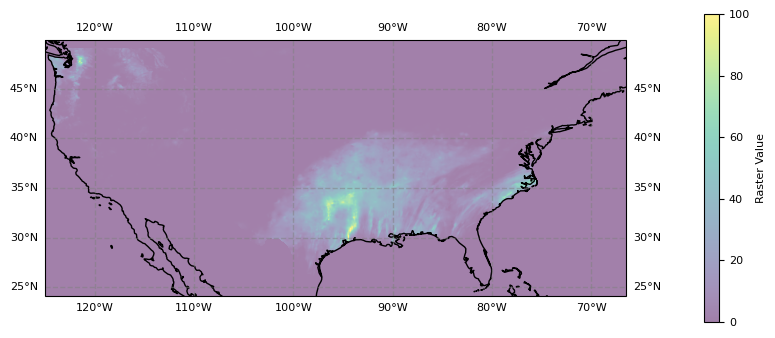

In [10]:
# Read raster data from .bil file
bil_file_path = os.path.join(home, f'{clim_var}', f'PRISM_{clim_var}_stable_4km{daily}_20210101_bil.bil') 

# Use rasterio to read the raster data
with rasterio.open(bil_file_path) as src:
    raster_data = src.read(1)
    transform = src.transform

# Visualize data on the map
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the desired minimum and maximum values for the colormap
vmin = 0  
vmax = 100  

# Plot the raster data using imshow with vmin and vmax
im = ax.imshow(raster_data, extent=(transform[2], transform[2] + transform[0] * raster_data.shape[1],
                                    transform[5] + transform[4] * raster_data.shape[0], transform[5]),
               origin='upper', cmap='viridis', alpha=0.5, vmin=vmin, vmax=vmax)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.1, shrink=0.4)
cbar.set_label('Raster Value')

# Add gridlines and coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines()

# Set aspect ratio to 'equal'
ax.set_aspect('equal')

plt.show()

In [12]:
# Convert the data into an xarray dataset 

def create_array_with_step(N, start_value, step): 
    result_array = []
    for i in range(N): 
        result_array.append(start_value + i * step) 
    return np.array(result_array)

header_data = parse_header(hdr_file)
x0 = float(header_data['ULXMAP'])
y0 = float(header_data['ULYMAP'])
dx = float(header_data['XDIM'])
dy = float(header_data['YDIM'])
    
Nx = raster_data.shape[1]
Ny = raster_data.shape[0]
# dx = transform[0]
# dy = transform[4]
# x0 = transform[2]
# y0 = transform[5] 
    
longitude = create_array_with_step(Nx, x0, dx)
latitude = create_array_with_step(Ny, y0, -dy) 
filename_parts = bil_file_path.split('.')[0].split('_') 

# Daily 
timestamp = np.array([datetime.strptime(filename_parts[4], '%Y%m%d')]) 

# Monthly 
# timestamp = np.array([datetime.strptime(filename_parts[4], '%Y%m')]) 
var_data = np.expand_dims(raster_data, axis=2)

In [13]:
ds = xr.Dataset(
    data_vars=dict(
        tmean=(('lat', 'lon', 'time'), var_data),
    ),
    coords=dict(
        lon=('lon', longitude),
        lat=('lat', latitude),
        time=('time', timestamp), 
    ),
    attrs=dict(description="PRISM data"),
)

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: No module named 'fiona'
Importing pyogrio resulted in: No module named 'pyogrio'

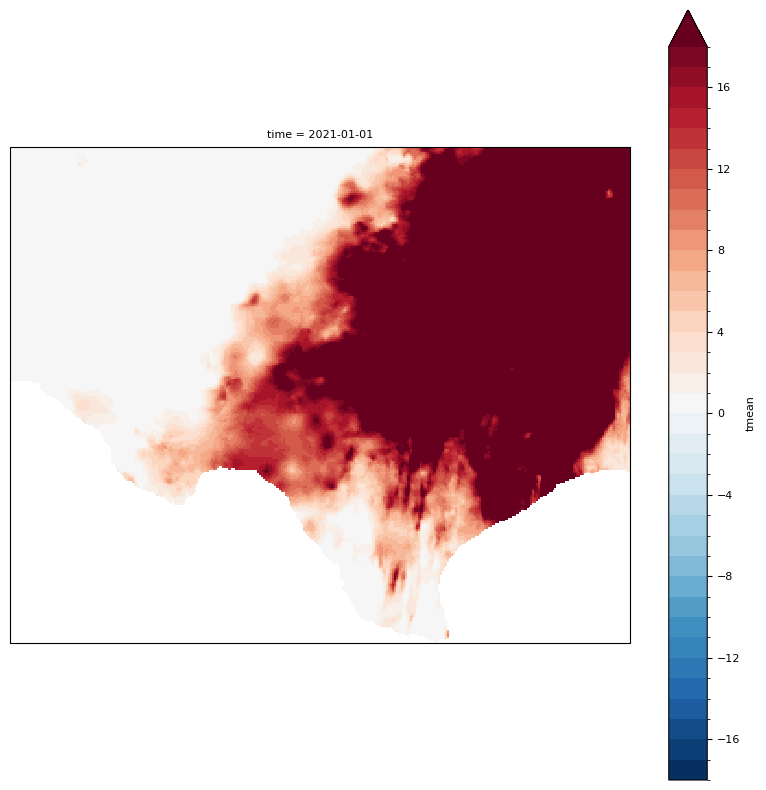

In [14]:

plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
levels = np.arange(-10, 31, 1) 
ds = ds.sortby('lat') 
ds_plot = ds.sel(lat = slice(25, 37), lon = slice(-107, -93)) 
ds_plot = ds_plot.where(ds_plot.tmean > -8000, drop = True) 
levels = np.arange(-18, 19, 1)
ds_plot.sel(time = '20210101').tmean.plot(x = 'lon', y = 'lat', ax = ax, levels = levels)

# shapefile = '/home/ib28/mymount/sd75/isabelleb/BWF_Pres/tl_2024_us_state.shp'
shapefile = os.path.join(home, 'tl_2024_us_county', 'tl_2024_us_state.shp')
states = gpd.read_file(shapefile)

##### Filter for Texas #####
texas = states[states['NAME'] == 'Texas']

##### Plot Texas Boundary #####
texas.boundary.plot(ax=ax, color='black', alpha = 0.5, linewidth=1)

# Read all datasets into NetCDF format

In [ ]:
def parse_header(hdr_file_path):
    """Parses a .hdr file and returns a dictionary of header information."""
    header = {}
    with open(hdr_file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                header[parts[0].upper()] = parts[1]
    return header

def parse_bil(bil_file_path): 
    # Use rasterio to read the raster data
    with rasterio.open(bil_file_path) as src:
        raster_data = src.read(1)
    return raster_data       

def create_array_with_step(N, start_value, step): 
    result_array = []
    for i in range(N): 
        result_array.append(start_value + i * step) 
    return np.array(result_array)

In [ ]:
variables = ['tmean', 'tdmean', 'ppt'] 
years = ['2021', '2022', '2023']
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for var in variables:
    
    homedir = f'{var}'

    outdir = os.path.join(home, homedir, 'netcdf') 
    if os.path.exists(outdir) == False: 
        os.mkdir(outdir) 
    for year in years: 
        for m in months: 
            # TODO: Add days 
            bil_file = os.path.join(home, homedir, f'PRISM_{var}_stable_4kmM3_{year}{m}_bil.bil') 
            hdr_file = os.path.join(home, homedir, f'PRISM_{var}_stable_4kmM3_{year}{m}_bil.hdr') 
    
            outfile = os.path.join(home, outdir, f'PRISM_{var}_stable_4kmM3_{year}{m}.nc')
    
            # Read in raster data 
            raster_data = parse_bil(bil_file) 
            Nx = raster_data.shape[1]
            Ny = raster_data.shape[0]
    
            # Read in header data 
            hdr_data = parse_header(hdr_file) 
            x0 = float(hdr_data['ULXMAP'])
            y0 = float(hdr_data['ULYMAP'])
            dx = float(hdr_data['XDIM'])
            dy = float(hdr_data['YDIM'])
    
            # Create coordinate arrays for dataset 
            longitude = create_array_with_step(Nx, x0, dx)
            latitude = create_array_with_step(Ny, y0, -dy) 
            filename_parts = bil_file.split('.')[0].split('_') 
            timestamp = np.array([datetime.strptime(filename_parts[4], '%Y%m')]) 
            var_data = np.expand_dims(raster_data, axis=2)
    
            # Create dataset 
            ds = xr.Dataset(
                data_vars=dict(
                    tmp=(('lat', 'lon', 'time'), var_data),
                ),
                coords=dict(
                    lon=('lon', longitude),
                    lat=('lat', latitude),
                    time=('time', timestamp), 
                ),
                attrs=dict(description=f"PRISM {var} data"),
            )
            ds = ds.rename({'tmp':var})
    
            # Save dataset 
            ds.to_netcdf(outfile) 

# Get values in Harris County 

In [ ]:
##### -------- Get KG Classes for Texas -------- #####

##### Read county shapefile from the HC Universal Services GIS Open Data Site #####
counties = gpd.read_file(shapefile)

# ##### Filter for HC #####
HC = counties[counties.NAME == 'Harris']

##### Read in files #####
variables = ['tmean', 'tdmean', 'ppt'] 
for var in variables: 
    homedir = os.path.join(home, f'{var}', 'netcdf') 
    files = glob.glob(os.path.join(home, homedir, '*.nc'))
    files.sort() 

    for f in files: 
        filename = f.split('/')[-1].split('.')[0]
        outfile = os.path.join(home, homedir, f'Harris_County_{filename}.nc') 
        # if os.path.exists(outfile): 
        #     os.remove(outfile) 
        with xr.open_dataset(f) as ds: 

            # Limit file 
            ds = ds.sortby('lat') 
            ds = ds.sel(lon = slice(-96.5, -94.5), lat = slice(29.1, 30.5))
            
            # Get the lat/lon coordinates
            lats = ds['lat'].values
            lons = ds['lon'].values
    
            # Create a 2D mesh of coordinates
            lon2d, lat2d = np.meshgrid(lons, lats)
    
            # Flatten the mesh for easier masking
            points = np.array([Point(xy) for xy in zip(lon2d.ravel(), lat2d.ravel())])
    
            # Check which points fall inside the HC polygon
            within_HC = np.array([HC.geometry.iloc[0].contains(p) for p in points])
            mask = within_HC.reshape(lat2d.shape)
    
            # Apply mask to data
            # If 3D (time, lat, lon)
            if "time" in ds.dims:
                mask = np.expand_dims(mask, axis=2)
                masked = ds.where(mask)
            else:
                # 2D (lat, lon)
                masked = ds.where(mask)
            
            # Save data 
            masked.to_netcdf(outfile) 

In [ ]:
# Plot the Harris County data for 202101 to check 
HC_bounds = [-96.1, -94.8, 29.45, 30.25]

var = 'tmean'
date = '202101'
year = date[:4]
mon = date[4:]
datestr = f'{date}01'

fig, ax = plt.subplots(1,2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (8, 5))

# ax.set_xlim(HC_bounds[0], HC_bounds[1]) 
# ax.set_ylim(HC_bounds[2], HC_bounds[3]) 

# Plot tmean 
infile = os.path.join(home, f'{var}', 'netcdf', f'Harris_County_PRISM_{var}_stable_4kmM3_{date}.nc') 
ds = xr.open_dataset(infile) 
ds = ds.sel(time = datestr, lon = slice(HC_bounds[0], HC_bounds[1]), lat = slice(HC_bounds[2], HC_bounds[3]))
levels = np.arange(11, 13.6, 0.1) 
CS = ds[var].plot(x = 'lon', y = 'lat', ax = ax[0], add_colorbar = False, levels = levels) 
CS = ds[var].plot.contourf(x = 'lon', y = 'lat', ax = ax[1], add_colorbar = False, levels = levels) 
ax[0].set_title('xarray plot method') 
ax[1].set_title('xarray countourf method') 

# Plot HC boundary 
for i in range(2): 
    counties = gpd.read_file(shapefile)
    HC = counties[counties.NAME == 'Harris']
    HC.boundary.plot(ax = ax[i]) 
    
    # Plot Characteristics 
    ax[i].axis('off') 
plt.colorbar(CS, ax = ax, orientation = 'horizontal', pad = 0.04, label = r'$T$ [$^\circ$C]') 
plt.suptitle(f'{year}-{mon} Mean Monthly Temperature in Harris County', y=0.77, fontsize = 10) 

# Time series of variables averaged over Harris County 

In [ ]:
def weighted_mean(ds, lat_name, lon_name): 
    lats = ds[lat_name]
    weights = np.cos(np.deg2rad(lats)) 
    weights.name = "weights"

    ds_weighted = ds.weighted(weights) 
    ds_weighted_mean = ds_weighted.mean([lon_name, lat_name]) 

    return ds_weighted_mean 

In [ ]:
variables = ['tmean', 'tdmean', 'ppt'] 
years = ['2021', '2022', '2023'] 
for var in variables: 
    for year in years: 
        homedir = os.path.join(home, f'{var}', 'netcdf') 
        files = glob.glob(os.path.join(homedir, f'Harris_County_PRISM_{var}_stable_4kmM3_{year}*.nc'))
        files.sort() 
    
        ds = xr.open_mfdataset(files, concat_dim = 'time', combine = 'nested').load() 
    
        outfile = os.path.join(home, homedir, f'Harris_PRISM_{var}_stable_4kmM3_{year}.nc')
        ds.to_netcdf(outfile) 

In [ ]:
variables = ['tmean', 'tdmean', 'ppt'] 
colors = ['orange', 'green', 'blue'] 
years = ['2021', '2022', '2023'] 
fig, ax = plt.subplots(1,1, figsize = (10,4)) 

for i, var in enumerate(variables): 
    color = colors[i]
    homedir = os.path.join(home, f'{var}', 'netcdf') 
    files = []
    for year in years: 
        files.append(os.path.join(home, homedir, f'Harris_PRISM_{var}_stable_4kmM3_{year}.nc')) 
        
    ds = xr.open_mfdataset(files, concat_dim = 'time', combine= 'nested') 

    # Get mean 
    ds_mean = weighted_mean(ds, 'lat', 'lon')
    
    if var == 'ppt': 
        twin1 = ax.twinx() 
        axplot = twin1
        twin1.spines['right'].set_color(color)
        twin1.tick_params(axis='x', colors=color)
        twin1.tick_params(axis='y', colors=color)
        twin1.set_ylabel('Precpiptation [mm]', color = color) 
    else: 
        axplot = ax

    # Plot 
    ds_mean[var].plot(x = 'time', ax = axplot, color=color, alpha = 0.7) 
    ds_mean[var].plot.scatter(x = 'time', ax = axplot, color=color, alpha = 0.7) 
        
# Add a legend manually if needed
labels = ['$T_{s}$', r'$T_{dp}$', r'$P$']
# Create custom legend items
legend_elements = [
    Line2D([0], [0], color=colors[0], label=labels[0]),
    Line2D([0], [0], color=colors[1], label=labels[1]),
    Line2D([0], [0], color=colors[2], label=labels[2])
]
ax.legend(ncol = 3, handles=legend_elements, loc = 'upper center',fancybox=True, framealpha=0.5)
ax.set_xlabel('') 
ax.set_ylabel(r'Temperature [$^\circ$C]') 
ax.grid() 
ax.set_title('Time Series over Harris County', fontsize = 10) 
twin1.set_ylabel('Precpiptation [mm]', color = color)

# Back Calculate Relative Humidity

In [ ]:
def rel_humidity(tas, tdp): 
    ''' 
    Calculates relative humidty (%) using the Mangus approximation 

    Inputs:
    tas - surface temperature (C)
    tdp - dew point temperature (C)

    Outputs:
    hurs - surface relative humidity (%)
    '''
    # Constants
    c1 = 17.625
    c2 = 243.04

    # Mangus Forumla
    hurs = 100*(np.exp((c1*tdp)/(c2+tdp))/np.exp((c1*tas)/(c2+tas)))

    return hurs 

In [ ]:
outdir = 'hurs'
if os.path.exists(outdir) == False: 
    os.mkdir(outdir) 
outdir = os.path.join(outdir, 'netcdf')
if os.path.exists(outdir) == False: 
    os.mkdir(outdir) 

for year in years: 

    files_tmean = glob.glob(os.path.join(home, 'tmean', 'netcdf', f'Harris_PRISM_tmean_stable_4kmM3_{year}.nc'))
    files_tmean.sort() 
    files_tdmean = glob.glob(os.path.join(home, 'tdmean', 'netcdf', f'Harris_PRISM_tdmean_stable_4kmM3_{year}.nc'))
    files_tdmean.sort() 

    ds_tmean = xr.open_mfdataset(files_tmean, concat_dim = 'time', combine = 'nested').load() 
    ds_tdmean = xr.open_mfdataset(files_tdmean, concat_dim = 'time', combine = 'nested').load() 

    outfile = os.path.join(home, outdir, f'Harris_PRISM_hurs_stable_4kmM3_{year}.nc')

    # Calculate relhum: 
    ds_hurs = rel_humidity(ds_tmean.tmean, ds_tdmean.tdmean)

    # Save as netcdf 
    ds_hurs = ds_hurs.to_dataset(name = 'hurs')
    ds_hurs.to_netcdf(outfile)
    

In [ ]:
years = ['2021', '2022', '2023'] 
fig, ax = plt.subplots(1,1, figsize = (10,4)) 
var = 'hurs'

homedir = os.path.join(home, f'{var}', 'netcdf') 
files = []
for year in years: 
    files.append(os.path.join(home, homedir, f'Harris_PRISM_{var}_stable_4kmM3_{year}.nc')) 
    
ds = xr.open_mfdataset(files, concat_dim = 'time', combine= 'nested') 

# Get mean 
ds_mean = weighted_mean(ds, 'lat', 'lon')

# Plot 
ds_mean[var].plot(x = 'time', ax = ax, color='purple', alpha = 0.7, label = r'$r$') 
ds_mean[var].plot.scatter(x = 'time', ax = ax, color='purple', alpha = 0.7) 


# ax.legend(loc = 'upper center',fancybox=True, framealpha=0.5)
ax.set_xlabel('') 
ax.set_ylabel(r'Relative Humidity [%]') 
ax.grid() 
ax.set_title('Relative Humidity over Harris County', fontsize = 10) 

# Calculate wet bulb temperature 

In [ ]:
def stull_wet_bulb_temp(tas, hurs):
    '''
    Calculates the approximation for wet bulb temperature developed by Stull et al (2011)

    Inputs:
    tas - surface temperature (C)
    hurs - relative humidity (%)

    Outputs:
    twbs - wet bulb temperature (C)
    '''

    # Constants
    c1 = 0.151977
    c2 = 8.313659
    c3 = 1.676331
    c4 = 0.00391838
    c5 = 0.023101
    c6 = 4.686035

    # Calculate wet bulb temperature
    twbs = tas * np.arctan(c1 * (hurs + c2)**(0.5)) + np.arctan(tas + hurs) - np.arctan(hurs - c3) + c4 * (hurs)**(1.5) * np.arctan(c5 * hurs) - c6

    return twbs


In [ ]:
outdir = 'twbs'
if os.path.exists(outdir) == False: 
    os.mkdir(outdir) 
outdir = os.path.join(outdir, 'netcdf')
if os.path.exists(outdir) == False: 
    os.mkdir(outdir)     

for year in years: 

    files_tmean = glob.glob(os.path.join(home, 'tmean', 'netcdf', f'Harris_PRISM_tmean_stable_4kmM3_{year}.nc'))
    files_tmean.sort() 
    files_hurs = glob.glob(os.path.join(home, 'hurs', f'Harris_PRISM_hurs_stable_4kmM3_{year}.nc'))
    files_hurs.sort() 

    ds_tmean = xr.open_mfdataset(files_tmean, concat_dim = 'time', combine = 'nested').load() 
    ds_hurs = xr.open_mfdataset(files_hurs, concat_dim = 'time', combine = 'nested').load() 

    outfile = os.path.join(home, outdir, f'Harris_PRISM_twbs_stable_4kmM3_{year}.nc')

    # Calculate relhum: 
    ds_twbs = stull_wet_bulb_temp(ds_tmean.tmean, ds_hurs.hurs)

    # Save as netcdf 
    ds_twbs = ds_twbs.to_dataset(name = 'twbs')
    ds_twbs.to_netcdf(outfile)
    

In [ ]:
years = ['2021', '2022', '2023'] 
fig, ax = plt.subplots(1,1, figsize = (10,4)) 
variables = ['twbs', 'tmean', 'hurs'] 
colors = ['red', 'orange', 'purple']

for i,var in enumerate(variables): 
    homedir = os.path.join(home, f'{var}', 'netcdf') 
    files = []
    for year in years: 
        files.append(os.path.join(home, homedir,  f'Harris_PRISM_{var}_stable_4kmM3_{year}.nc')) 
        
    ds = xr.open_mfdataset(files, concat_dim = 'time', combine= 'nested') 
    
    # Get mean 
    ds_mean = weighted_mean(ds, 'lat', 'lon')

    if var == 'hurs': 
        twin1 = ax.twinx() 
        axplot = twin1
        twin1.spines['right'].set_color(colors[i])
        twin1.tick_params(axis='x', colors=colors[i])
        twin1.tick_params(axis='y', colors=colors[i])
    else: 
        axplot = ax
    
    # Plot 
    ds_mean[var].plot(x = 'time', ax = axplot, color=colors[i], alpha = 0.7, label = r'$r$') 
    ds_mean[var].plot.scatter(x = 'time', ax = axplot, color=colors[i], alpha = 0.7) 

labels = ['$T_{wbs}$', r'$T_{s}$', r'$r$']
# Create custom legend items
legend_elements = [
    Line2D([0], [0], color=colors[0], label=labels[0]),
    Line2D([0], [0], color=colors[1], label=labels[1]),
    Line2D([0], [0], color=colors[2], label=labels[2])
]
ax.legend(ncol = 3, handles=legend_elements, loc = 'upper center',fancybox=True, framealpha=0.5)
ax.set_xlabel('') 
twin1.set_ylabel(r'Relative Humidity [%]', color = colors[2]) 
ax.set_ylabel(r'Temperature [$^\circ$C]') 
ax.grid() 
ax.set_title('Time Series over Harris County', fontsize = 10)
